# Exploaration Project 01. Rock Paper Scissors Classifier

## 00. get dataset
- 구글의 [teachable machine 사이트](https://teachablemachine.withgoogle.com/)를 이용해서 가위바위보 사진을 촬영한다.
- 촬영한 이미지의 크기를 224x224 => 28x28로 변경한다.

In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
# !pip install pillow   

from PIL import Image
import os, glob
import numpy as np

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/project/Project_AIFFEL/dataset/rock_scissors_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/project/Project_AIFFEL/dataset/rock_scissors_paper/rock
바위 이미지 resize 완료!


In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/project/Project_AIFFEL/dataset/rock_scissors_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/project/Project_AIFFEL/dataset/rock_scissors_paper/paper
보 이미지 resize 완료!


In [4]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/project/Project_AIFFEL/dataset/rock_scissors_paper/scissors"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/project/Project_AIFFEL/dataset/rock_scissors_paper/scissors
가위 이미지 resize 완료!


## 01. load data
- load_data 함수를 만들어 데이터를 불러온다.
- 이미지와 정답 데이터를 담을 행렬을 미리 만든다.
- 이미지가 담겨있는 폴더에서 이미지를 불러와 행렬에 저장한다.(for loop사용)

In [5]:
from sklearn import model_selection

In [181]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3000   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
#     return imgs[:1200], labels[:1200]
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/dataset/rock_scissors_paper/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train_norm, y_train, test_size=0.1,
                                                                     random_state=15)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (2700, 28, 28, 3)
y_train shape: (2700,)


- 이미지 출력

라벨:  2


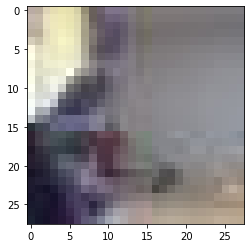

In [182]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 02. build Deep Learning network

In [183]:
import tensorflow as tf
from tensorflow import keras


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_71/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](max_pooling2d_67/Identity, conv2d_71/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [3,3,64,128].

**trouble**
- 레이어를 많이 쌓으려고 했는데, Convolution 연산을 여러번 하기에 28x28 사이즈의 이미지는 많이 작았다. 
- 3번 연산을 한 후의 output shape이 (None, 1, 1, 64)로 더이상 연산을 할 수 없어서 Error발생
- 28x28 사이즈의 이미지에서는 (3,3) convolution연산이 최대 3번만 가능하다.   

**output shape 계산 방법**
- keras의 Conv2D의 default stride = 1
- (n x n)의 convolution layer라고 가정
- (m x m x colour channel)의 input shape라고 가정 
- output shape = (m - n + 1) x (m - n + 1)
- **만약** stride = 3 이라면, output shape = (m - n + 1)/3 x (m - n + 1)/3     

**네트워크 설계하기**
- 계산 가능한 수의 레이어를 쌓았다.
- 최종 dense layer는 가위, 바위, 보 3개의 class이므로 3을 넣는다.
- activation : 최종 dense layer에는 softmax를 사용해 multi classification이 가능하게 한다. 

In [306]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.7))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_132 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_128 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_77 (Dropout)         (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 11, 11, 128)       18560     
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_130 (MaxPoolin (None, 1, 1, 128)       

## 03. train data with your network
- model.compile(), model.fit()을 이용한다.

In [307]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# history = model.fit(x_train, y_train, epochs=100)
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_valid, y_valid))

Epoch 1/150
85/85 [==============================] - 0s 3ms/step - loss: 1.1008 - accuracy: 0.3281 - val_loss: 1.0961 - val_accuracy: 0.3233
Epoch 2/150
85/85 [==============================] - 0s 2ms/step - loss: 1.0924 - accuracy: 0.3615 - val_loss: 1.0842 - val_accuracy: 0.3800
Epoch 3/150
85/85 [==============================] - 0s 2ms/step - loss: 1.0751 - accuracy: 0.3822 - val_loss: 0.9881 - val_accuracy: 0.5367
Epoch 4/150
85/85 [==============================] - 0s 2ms/step - loss: 0.9473 - accuracy: 0.5444 - val_loss: 0.7242 - val_accuracy: 0.6800
Epoch 5/150
85/85 [==============================] - 0s 2ms/step - loss: 0.8194 - accuracy: 0.6481 - val_loss: 0.5460 - val_accuracy: 0.7933
Epoch 6/150
85/85 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.7259 - val_loss: 0.4667 - val_accuracy: 0.7933
Epoch 7/150
85/85 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7544 - val_loss: 0.3468 - val_accuracy: 0.8567
Epoch 8/150
8

Epoch 59/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9881 - val_loss: 0.0507 - val_accuracy: 0.9933
Epoch 60/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9863 - val_loss: 0.0382 - val_accuracy: 0.9867
Epoch 61/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9756 - val_loss: 0.1156 - val_accuracy: 0.9667
Epoch 62/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9804 - val_loss: 0.0140 - val_accuracy: 0.9933
Epoch 63/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9826 - val_loss: 0.0243 - val_accuracy: 0.9900
Epoch 64/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9889 - val_loss: 0.0365 - val_accuracy: 0.9900
Epoch 65/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9881 - val_loss: 0.0260 - val_accuracy: 0.9900
Epoch 

85/85 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9881 - val_loss: 0.0418 - val_accuracy: 0.9900
Epoch 117/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0519 - val_accuracy: 0.9900
Epoch 118/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9807 - val_loss: 0.0632 - val_accuracy: 0.9900
Epoch 119/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0566 - val_accuracy: 0.9867
Epoch 120/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0326 - val_accuracy: 0.9933
Epoch 121/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0326 - val_accuracy: 0.9900
Epoch 122/150
85/85 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9885 - val_loss: 0.0319 - val_accuracy: 0.9900
Epoch 123/150

## 04. evaluate your network with test data
- test data를 로드해 dataset을 train과 같이 만들어준다.

In [308]:
def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("평가데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/dataset/rock_scissors_paper_test/"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

평가데이터(x_test)의 이미지 개수는 200 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


- model.evaluate()로 평가한다.

In [309]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.5920 - accuracy: 0.6233
test_loss: 1.5919737815856934 
test_accuracy: 0.6233333349227905


## test_accuracy를 높이자
1. test_accuracy: 0.31333333253860474   
    : train data 수가 300개로 test data와 같아서 test 정확도가 train_accuracy(1.0)에 비해 현저히 낮은 것으로 추정된다. 
2. test_accuracy: 0.3333333432674408
    : train data 300 -> 1200으로 늘렸으나 미미하게 올라감
3. test_accuracy: 0.36666667461395264
    : train data 1200 -> 3000으로 늘렸으나 미미하게 올라감
    => validation split을 해보자!
4. test_accuracy: 0.03133333474397659
    : test_size=0.2로 valid split, epoch= 50 -> 200 으로 변경했으나 오히려 떨어짐   
5. test_accuracy: 0.039000000804662704
    : drop_out 을 추가했지만 나아지지 않았다.   
6. 그래프가 일정하게 수렴하는 모양이 아니어서 마지막 Conv2d의 갯수를 128 -> 64 로 줄였더니 일정하게 수렴했다.(test결과는 0.03900..)   
7. test_accuracy: 0.3166666626930237   
    : 레이어를 수정하고, validation set을 사용하지 않았다.   
    - Conv2D 32, 64, 128 /Dense 64, 32, 3 => Conv2D 32, 64, 128 /Dense 128, 32, 3   
    - 이전 레이어에서는 convolution layer에서 dense layer 로 넘어가면서 파라미터가 급격히 축소되는 것을 방지하고자 함.
    
## 05. visualize model training history
- matplotlib을 사용해 시각화한다.

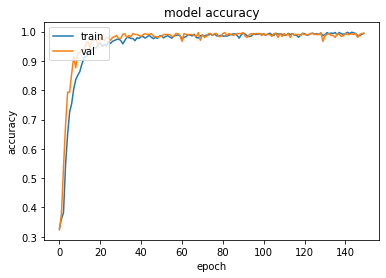

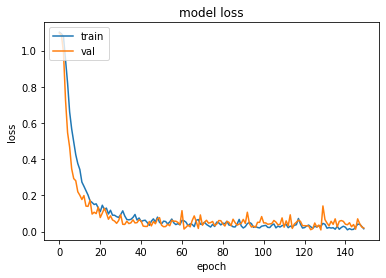

In [310]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

-> overfitting 

## 회고 
1. train에 비해 test결과가 좋지 않다. 
    : 처음엔 데이터의 양이 부족해서 생기는 문제라고 생각했다. 이를 해결하기 위해 10배를 늘렸지만 해결되지 않았다.
2. 레이어 파라미터 조정 
    : 레이어 파라미터가 급격히 줄어드는 것을 model.summary로 확인했다. 이를 해결하기 위해 레이어 개수를 조정했다.
3. Overfitting
    : 해결하고자 drop out을 추가했으나, 해결할 수 없었다.
    
    
**결론**    
- 데이터가 좋지 않다. : 연속 사진으로 촬영되는 사이트 특성 상 비슷한 데이터가 많을 가능성이 크다.     
- input data가 레이어를 거치면서 어떻게 변화하는지 보는 것이 중요하다.